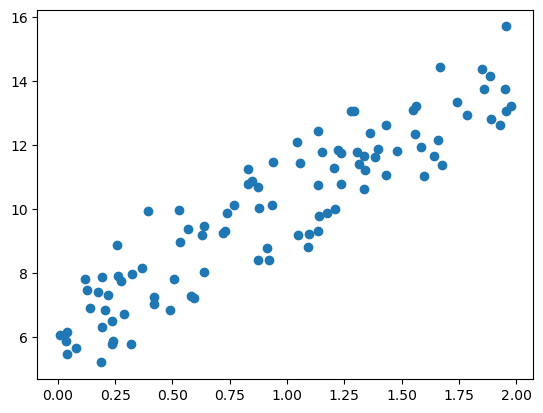

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) #시행할 떄마다 똑같은 난수를 생성해주기 위함.
#y=4x+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X=2 * np.random.rand(100,1) #0과 1사이 균일하게 분포된 난수를 생성 / (100,1) 2차원 형태로
y=6 + 4 * X + np.random.randn(100,1) #평균은 0이고 표준편차는 1인 정규분포를 따르는 난수 생성

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [7]:
#비용핫무 정의
N=len(y)
def get_cost(y,y_pred):
    cost=np.sum(np.square(y-y_pred))/N
    return cost

In [9]:
#w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    #먼저 w1_update, w0_update를 각각 w1, w0의 동일한 크기를 가진 0값으로 초기화
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred=np.dot(X,w1.T)+w0
    diff=y-y_pred

    #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors=np.ones((N,1))
    #w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update, w0_update

In [25]:
# 입력인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
    #w0와 w1을 모두 0으로 초기화
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1,w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update= get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    return w1,w0

In [28]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost
w1, w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred=w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


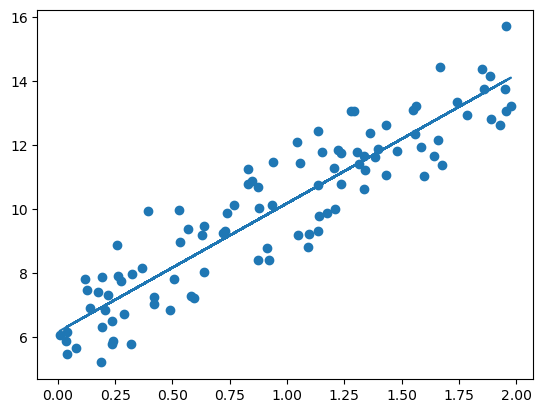

In [30]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [45]:
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
boston=pd.read_csv("C:/Users/USER/Desktop/AIchemist/boston.csv")
bostonDF=boston.rename(columns={'MEDV':'PRICE'})
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)



In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변형된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변형된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
def polynomial_func(X):
    y= 1 + 2*X[:,0] + 3*X[:,0]**2+ 4*X[:,1]**3
    return y
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [23]:
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [24]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y= 1 + 2*X[:,0] + 3*X[:,0]**2+ 4*X[:,1]**3
    return y

model=Pipeline([('poly', PolynomialFeatures(degree=3)),
                ('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)
model=model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [25]:
def true_fun(X):
    return np.cos(1.5 * np.pi *X)
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))
y=true_fun(X)+np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872317626 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE는 182493841.77304456 입니다.


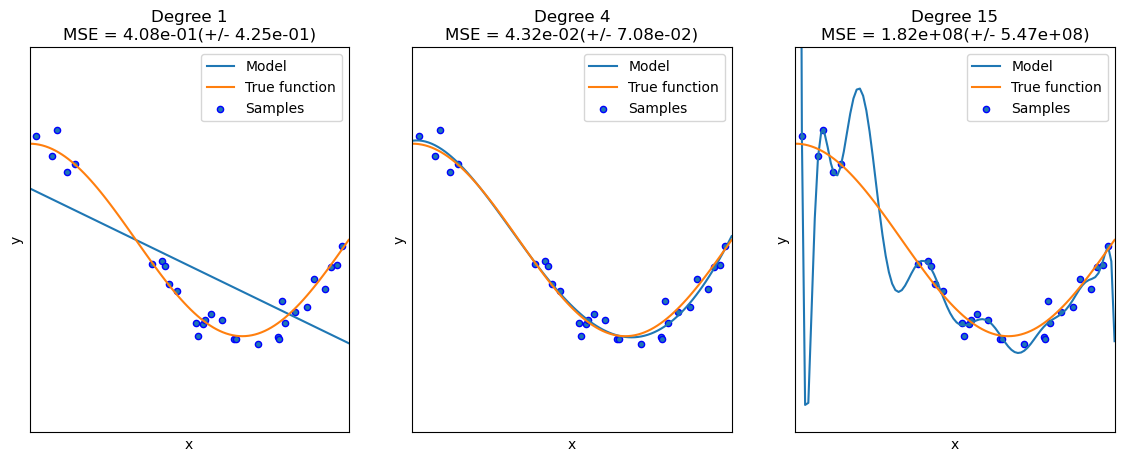

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    scores=cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error",cv=10)
    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 호출
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    X_test=np.linspace(0,1,100)
    #predict는 2차원 배열의 값만 받기 때문에 reshape해줌
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    #실제 함수를 실선을 이용해서 그림, 그래프 이름은 라벨로 지정
    plt.plot(X_test, true_fun(X_test), '-', label="True function")
    #파란색으로 서로의 산점도를 찍어줌, 이름은 라벨로 지정
    plt.scatter(X,y,edgecolor='b', s=20, label="Samples")
    #그래프의 축 이름 지정, 범위 지정, 라벨표는 최적의 자리에 위치
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0 , 1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
    

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negatibe MSE scores:',np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negatibe MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [49]:
alphas=[0,0.1,1,10,100]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1일 때 5 folds의 평균 RMSE : 5.788
alpha 1일 때 5 folds의 평균 RMSE : 5.653
alpha 10일 때 5 folds의 평균 RMSE : 5.518
alpha 100일 때 5 folds의 평균 RMSE : 5.330


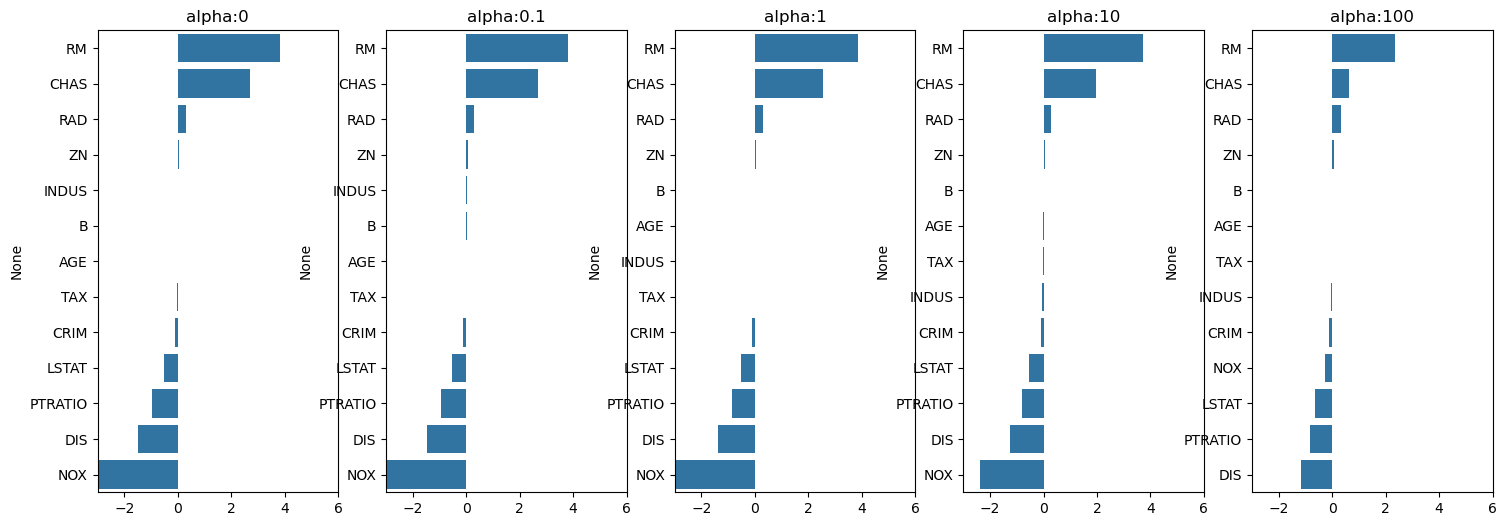

In [55]:
fig, axs=plt.subplots(figsize=(18,6), nrows=1, ncols=5) #subplot에서 두가지 객체가 결과로 나옴
coeff_df=pd.DataFrame()
for pos, alpha in enumerate(alphas): #pos는 alphas의 인덱스를 말함
    ridge=Ridge(alpha=alpha) #릿지 모델 정의
    ridge.fit(X_data,y_target) #데이터 학습시키기
    coeff=pd.Series(data=ridge.coef_, index=X_data.columns) #각 column에 따른 회귀계수 입력
    colname='alpha:'+str(alpha) #데이터 프레임에 들어갈 열이름 지정
    coeff_df[colname]=coeff #시리즈를 데이터 프레임 값으로 지정
    coeff=coeff.sort_values(ascending=False) #내림차순으로 
    axs[pos].set_title(colname) #각 인덱스마다의 subplot 그래프 제목 지정
    axs[pos].set_xlim(-3,6) #범위
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [56]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False) #alpha0을 기준으로 내림차순 정렬

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [73]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df=pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name=='Ridge' : model = Ridge(alpha=param)
        elif model_name=='Lasso': model = Lasso(alpha=param)
        elif model_name=='ElasticNet':model=ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_scores=cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}'.format(param,avg_rmse))

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff=pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param) 
            coeff_df[colname]=coeff 
            coeff=coeff.sort_values(ascending=False) 
    return coeff_df

In [69]:
lasso_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df=get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 folds의 평균 RMSE : 5.612
alpha 0.1일 때 5 folds의 평균 RMSE : 5.615
alpha 0.5일 때 5 folds의 평균 RMSE : 5.669
alpha 1일 때 5 folds의 평균 RMSE : 5.776
alpha 3일 때 5 folds의 평균 RMSE : 6.189


In [70]:
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [74]:
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet',params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5 folds의 평균 RMSE : 5.542
alpha 0.1일 때 5 folds의 평균 RMSE : 5.526
alpha 0.5일 때 5 folds의 평균 RMSE : 5.467
alpha 1일 때 5 folds의 평균 RMSE : 5.597
alpha 3일 때 5 folds의 평균 RMSE : 6.068


In [75]:
sort_column='alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [86]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method=None, p_degree=None, input_data=None):
    if method=='Standard':
        scaled_data=StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data=MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data=input_data

    if p_degree !=None:
        scaled_data=PolynomialFeatures(degree=p_degree,
                                       include_bias=False).fit_transform(scaled_data)
    return scaled_data                                   

In [92]:
alphas=[0.1,1,10,100]
scale_methods=[(None,None), ('Standard',None), ('Standard',2),
               ('MinMax',None), ('MinMax',2),('Log',None)]
for scale_method in scale_methods:
    X_data_scaled=get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                 input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE : 5.788
alpha 1일 때 5 folds의 평균 RMSE : 5.653
alpha 10일 때 5 folds의 평균 RMSE : 5.518
alpha 100일 때 5 folds의 평균 RMSE : 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE : 5.826
alpha 1일 때 5 folds의 평균 RMSE : 5.803
alpha 10일 때 5 folds의 평균 RMSE : 5.637
alpha 100일 때 5 folds의 평균 RMSE : 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE : 8.827
alpha 1일 때 5 folds의 평균 RMSE : 6.871
alpha 10일 때 5 folds의 평균 RMSE : 5.485
alpha 100일 때 5 folds의 평균 RMSE : 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 folds의 평균 RMSE : 5.764
alpha 1일 때 5 folds의 평균 RMSE : 5.465
alpha 10일 때 5 folds의 평균 RMSE : 5.754
alpha 100일 때 5 folds의 평균 RMSE : 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 folds의 평균 RMSE : 5.298
alpha 1일 때 5 folds의 평균 RMSE : 4.323
alpha 10일 때 5 folds의 평균 RMSE : 5.185
alpha 100일 때 5 folds의 평균 RMSE : 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 f

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer=load_breast_cancer()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test=train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [102]:
from sklearn.metrics import accuracy_score, roc_auc_score
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds=lr_clf.predict(X_test)

print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                  roc_auc_score(y_test, lr_preds)))

accuracy: 0.977, roc_auc:0.972


In [106]:
solvers=['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
for solver in solvers:
    lr_clf=LogisticRegression(solver=solver,max_iter=600)
    lr_clf.fit(X_train,y_train)
    lr_preds=lr_clf.predict(X_test)
    print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test,lr_preds),
                                                                        roc_auc_score(y_test,lr_preds)))

solver:lbfgs, accuracy:0.977, roc_auc:0.972
solver:liblinear, accuracy:0.982, roc_auc:0.979
solver:newton-cg, accuracy:0.977, roc_auc:0.972
solver:sag, accuracy:0.982, roc_auc:0.979
solver:saga, accuracy:0.982, roc_auc:0.979


In [108]:
from sklearn.model_selection import GridSearchCV
params={'solver':['liblinear','lgbfs'], 'penalty':['l2','l1'],
        'C':[0.01,0.1,1,5,10]}
lr_clf=LogisticRegression()
grid_clf=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


C:\ProgramData\anaconda33\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda33\Lib\site-pack

In [113]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores: ',np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE :{0:.3f}',format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE :{0:.3f} 4.422538982804892


In [118]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model,X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('##### ',model.__class__.__name__,'#####')
    print('5 교차 검증의 평균 RMSE :{0:.3f}'.format(avg_rmse))

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

models=[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE :5.978
#####  RandomForestRegressor #####
5 교차 검증의 평균 RMSE :4.423
#####  GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE :4.269


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
           ^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\sklearn.py", line 761, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\sklearn.py", line 286, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\sklearn.py", line 775, in <lambda>
    create_dmatrix=lambda **kwargs: DMatrix(nthread=self.n_jobs, **kwargs),
                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
           ^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\core.py", line 616, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
                                           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\data.py", line 707, in dispatch_data_backend
    return _from_pandas_df(data, enable_categorical, missing, threads,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\data.py", line 297, in _from_pandas_df
    data, feature_names, feature_types = _transform_pandas_df(
                                         ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\xgboost\data.py", line 250, in _transform_pandas_df
    elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
                                   ^^^^^^^^^^^^^
AttributeError: module 'pandas' has no attribute 'Int64Index'


(100, 2)


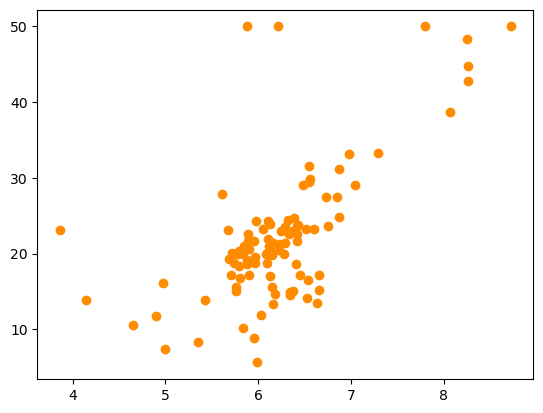

In [120]:
bostonDF_sample=bostonDF[['RM','PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [123]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

X_test=np.arange(4.5, 8.5, 0.04).reshape(-1,1)
X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

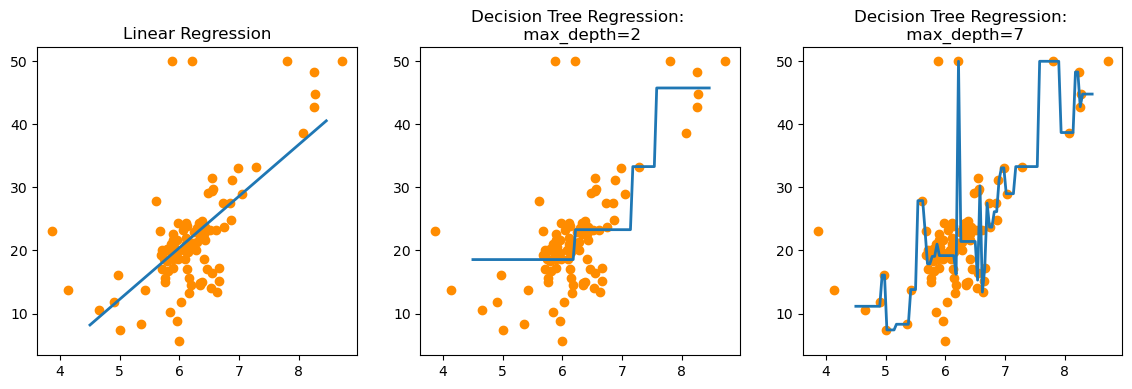

In [132]:
fig, (ax1, ax2, ax3)= plt.subplots(figsize=(14,4), ncols=3)
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='linear', linewidth=2)
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='linear', linewidth=2)

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#데이터 가공을 많이 할 예정이라 원본 데이터프레임 따로 저장
house_df_org=pd.read_csv('train (3).csv')
house_df=house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [51]:
print('shape:',house_df.shape)
print('type:',house_df.dtypes.value_counts()) #데이터 세트 type
isnull_series=house_df.isnull().sum()
print('Null값 확인:', isnull_series[isnull_series>0].sort_values(ascending=False))
#null값이 너무 많은 feaures들은 삭제

shape: (1460, 81)
type: object     43
int64      35
float64     3
Name: count, dtype: int64
Null값 확인: PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


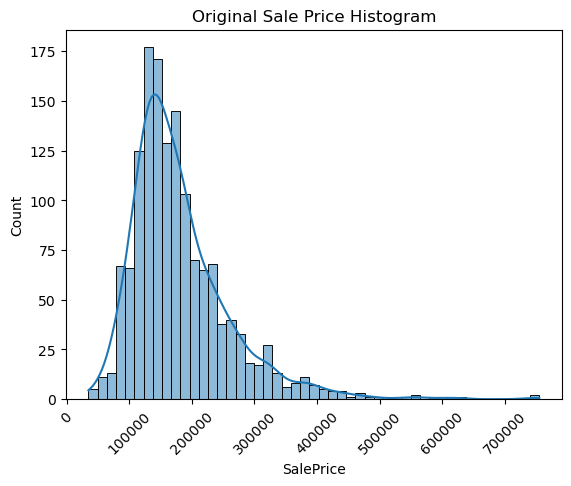

In [46]:
#회귀 모델 적용하기 전 타깃갑스이 분포도가 정규분포인가?

plt.title('Original Sale Price Histogram')
plt.xticks(rotation=45) #x축 글자들 회전해서 표시
sns.histplot(house_df['SalePrice'], kde=True) #데이털르 부드럽게 연결해주어 확률밀도함수 추정가능
plt.show()

#왼쪽으로 치우친 분포도

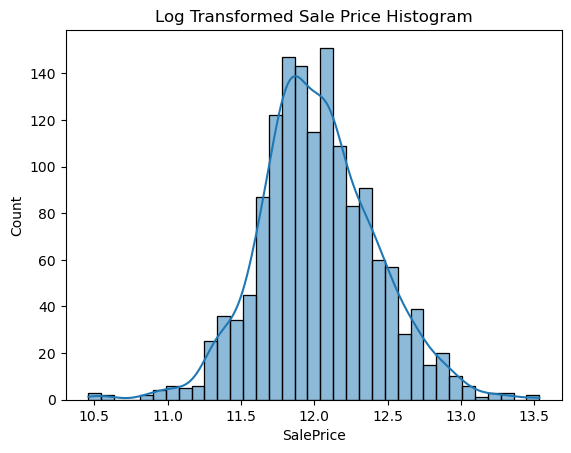

In [47]:
#타깃 값을 로그 변환하고 다시 분포도 살펴보기

plt.title('Log Transformed Sale Price Histogram')
log_SalePrice=np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

#정규분포형태로 결괏값이 변환됨.

In [56]:
#SalePrice 로그 변환
original_SalePrice=house_df['SalePrice']
house_df['SalePrice']=np.log1p(house_df['SalePrice'])

#Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id','PoolQC','MiscFeature','Alley', 'Fence','FireplaceQu'], axis=1, inplace=True)

#드롭하지 않는 숫자형 Null 칼럼은 평균갑으로 대체
house_df.fillna(house_df.select_dtypes(include='number').mean(), inplace=True)

#Null 값이 있는 피처명과 티입을 추출
null_column_count=house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type: \n', house_df.dtypes[null_column_count.index]) 

## Null 피처의 Type: 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [58]:
#문자형 피처는 모두 원-핫 인코딩 변환
#null 값은 자동으로 0으로 처리되어 따로 처리할 필요 없음
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe=pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 270)


In [75]:
#로그 변환된 RMSE를 측정하는 함수 생성
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test, pred)
    rmse=np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse,3))
    return rmse

In [76]:
#RMSE 값 저장하기
def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.127
Lasso 로그 변환된 RMSE: 0.176


[0.1318318468825032, 0.1274058283626614, 0.17628250556471403]

In [79]:
#라쏘의 경우 하이퍼 파라미터 튜닝이 필요해보임
#모델 별로 어떠한 피처의 회귀계수로 구성되나 시각화

def get_top_bottom_coef(model, n=10):
    coef=pd.Series(model.coef_, index=X_features.columns)
    coef_high=coef.sort_values(ascending=False).head(n)
    coef_low=coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low
    

In [82]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model=GridSearchCV(model, param_grid=params,
                            scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse=np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 cv 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)


Ridge 5 cv 시 최적 평균 RMSE 값:0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 cv 시 최적 평균 RMSE 값:0.142, 최적 alpha:{'alpha': 0.001}


In [83]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge(alpha=12)
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)
models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


[0.1318318468825032, 0.12386974257131528, 0.11995999858899734]

In [90]:
#1.피처 데이터 세트의 데이터 분포도
#2.이상치 데이터 처리
#skew함수를 쓸떄에는 원핫인코딩 된 것을 피해줘야함.

from scipy.stats import skew
#숫자형 피처의 칼럼 index추출
features_index=house_df.dtypes[house_df.dtypes!='object'].index
#index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환, apply lambda로 skew()호출
skew_features=house_df[features_index].apply(lambda x:skew(x))
skew_features_top=skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
14.813135        14.348342
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
10.293752         7.727026
9.00208           7.452650
24.45164          5.165390
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
4.099186          3.929022
4.483784          3.865437
4.117977          3.147171
EnclosedPorch     3.086696
MasVnrArea        2.673661
4.250888          2.521100
LotFrontage       2.382499
OpenPorchSF       2.361912
3.086696          2.110104
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [96]:
house_df[skew_features_top]=np.log1p(house_df[skew_features_top.index])
#다시 원 핫 인코딩
house_df_ohe=pd.get_dummies(house_df)
y_target=house_df_ohe['SalePrice']
X_features=house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params={'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params={'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)



ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1167, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py", line 608, in _validate_data
    self._check_feature_names(X, reset=reset)
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\base.py", line 469, in _check_feature_names
    feature_names_in = _get_feature_names(X)
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda33\Lib\site-packages\sklearn\utils\validation.py", line 2229, in _get_feature_names
    raise TypeError(
TypeError: Feature names are only supported if all input features have string names, but your input has ['float', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.


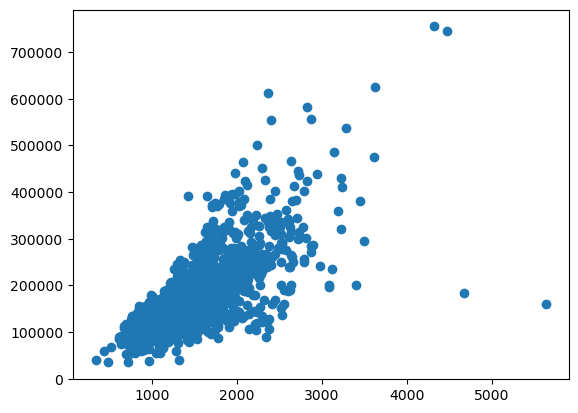

In [103]:
plt.scatter(x=house_df_org['GrLivArea'], y= house_df_org['SalePrice'])
plt.show()

In [105]:
#4000평방피트 이상임에도 가격이 5000000달러 이하인 데이터 삭제
cond1=house_df_ohe['GrLivArea']>np.log1p(4000)
cond2=house_df_ohe['SalePrice']<np.log1p(500000)
outlier_index=house_df_ohe[cond1&cond2].index
print('이상치 레코드:', outlier_index.values)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)

이상치 레코드: [   0    1    2 ... 1457 1458 1459]
